# Preprocessing

## Importing and Modifying Dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataSet = pd.read_csv('data/UNSW_NB15.csv')
#drop id and label columns
dataSet = dataSet.iloc[:,1:44]
dataSet.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,Normal
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,Normal
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,Normal
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,Normal
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,Normal


In [24]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [25]:
# check if there are Null values
dataSet.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
dtype: int6

## Enconding

### 1-N encoding

In [26]:
dataSet['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [27]:

dataSet['attack_cat'].replace({ 'DoS' : 1, 'Normal':0, 'Reconnaissance':0, 'Backdoor':0, 'Exploits':0,
       'Analysis':0, 'Fuzzers':0, 'Worms':0, 'Shellcode':0, 'Generic':0},inplace = True)

In [28]:
for col_name in dataSet.columns:
    if dataSet[col_name].dtypes == 'object' :
        unique_cat = len(dataSet[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'proto' has 133 categories
Feature 'service' has 13 categories
Feature 'state' has 9 categories


### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['proto','service','state'] 
for f in features:
    dataSet[f] = le.fit_transform(dataSet[f]) 


# One-hot encode categorical variables
#dataSet = pd.get_dummies(dataSet, columns=['state'])
dataSet.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,1,0,0,0,1,1,0,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,1,3,1,1,0,2,1,0,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,2,1,40,0,0,0,2,39,0,0


## Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
dataSet=pd.DataFrame(scaler.fit_transform(dataSet),
            columns=dataSet.columns, index=dataSet.index) 



dataSet.head(20)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,2.024634e-03,0.856061,0.000000,0.250,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,...,0.00,0.0,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.0
1,1.083170e-02,0.856061,0.000000,0.250,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,...,0.00,0.0,0.015625,0.00,0.00,0.000000,0.000000,0.081967,0.0,0.0
2,2.705215e-02,0.856061,0.000000,0.250,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,...,0.00,0.0,0.031250,0.00,0.00,0.000000,0.016949,0.081967,0.0,0.0
3,2.802737e-02,0.856061,0.250000,0.250,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,...,0.00,0.0,0.031250,0.25,0.25,0.000000,0.016949,0.000000,0.0,0.0
4,7.490901e-03,0.856061,0.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,...,0.02,0.0,0.609375,0.00,0.00,0.000000,0.016949,0.622951,0.0,0.0
5,6.342284e-03,0.856061,0.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000039,0.996078,...,0.02,0.0,0.609375,0.00,0.00,0.000000,0.016949,0.622951,0.0,0.0
6,1.061849e-02,0.856061,0.000000,0.250,0.000936,0.000729,0.000039,0.000024,0.000027,0.996078,...,0.00,0.0,0.609375,0.00,0.00,0.000000,0.000000,0.622951,0.0,0.0
7,8.693068e-03,0.856061,0.000000,0.250,0.000936,0.000729,0.000039,0.000024,0.000033,0.996078,...,0.04,0.0,0.609375,0.00,0.00,0.000000,0.033898,0.622951,0.0,0.0
8,9.048418e-03,0.856061,0.000000,0.250,0.000936,0.000729,0.000039,0.000024,0.000031,0.996078,...,0.04,0.0,0.609375,0.00,0.00,0.000000,0.033898,0.622951,0.0,0.0
9,4.311451e-03,0.856061,0.000000,0.250,0.000936,0.000547,0.000039,0.000018,0.000058,0.996078,...,0.04,0.0,0.609375,0.00,0.00,0.000000,0.033898,0.622951,0.0,0.0


## Data balancing

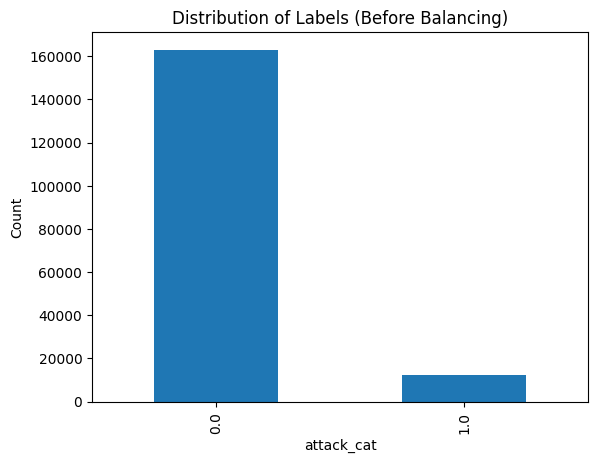

In [31]:
#before balancing the label
import matplotlib.pyplot as plt

# plot the distribution of the 'label' column before balancing
dataSet['attack_cat'].value_counts().plot(kind='bar')
plt.xlabel('attack_cat')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

In [32]:
x = dataSet.iloc[:,0:42]
y = dataSet.iloc[:,42]

In [59]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, train_size = 0.8,
                                                    random_state = 88, shuffle= True,
                                                    stratify=y)

In [10]:
#combined_data = pd.concat([x_train, x_test])
# Perform one-hot encoding on the combined dataset
#combined_data = pd.get_dummies(combined_data, columns=['proto', 'service', 'state'])

In [11]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
 
#combined_data=pd.DataFrame(scaler.fit_transform(combined_data),
           # columns=combined_data.columns, index=combined_data.index) 



#combined_data.head(20)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
173542,5.000001e-08,0.000104,0.000000,0.000007,0.000000,0.333333,0.996078,0.000000,2.538410e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
110522,1.500000e-07,0.000104,0.000000,0.000013,0.000000,0.111111,0.996078,0.000000,1.484450e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86908,1.032554e-02,0.000936,0.000547,0.000041,0.000018,0.000024,0.996078,0.992126,1.099802e-06,0.000129,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
128229,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96489,1.078210e-02,0.000936,0.000729,0.000064,0.000134,0.000026,0.243137,0.992126,1.606694e-06,0.000948,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
154740,1.500000e-07,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,0.000000,8.461366e-03,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
73080,1.272234e-02,0.000728,0.000729,0.000026,0.000056,0.000020,0.243137,0.992126,5.583170e-07,0.000339,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
57190,1.500000e-07,0.000104,0.000000,0.000013,0.000000,0.111111,0.996078,0.000000,1.484450e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29460,7.161168e-04,0.006136,0.005650,0.000277,0.003414,0.002816,0.121569,0.114173,1.105072e-04,0.408778,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
117510,1.500000e-07,0.000104,0.000000,0.000011,0.000000,0.111111,0.996078,0.000000,1.246938e-02,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Split the dataset back into training and test sets
#x_train= combined_data.iloc[:x_train.shape[0], :]
#x_test = combined_data.iloc[x_train.shape[0]:, :]

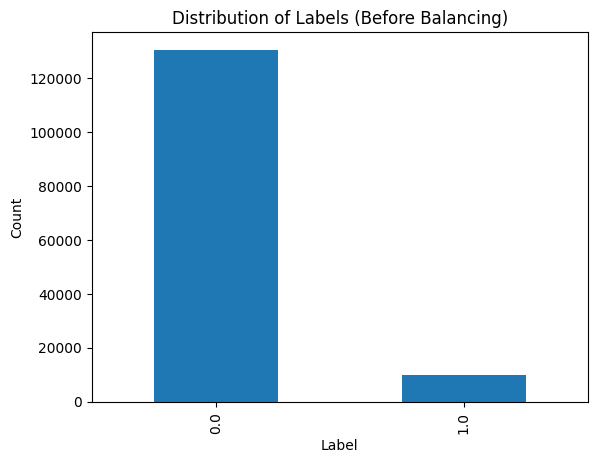

In [34]:
# plot the distribution of the 'label' column before balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

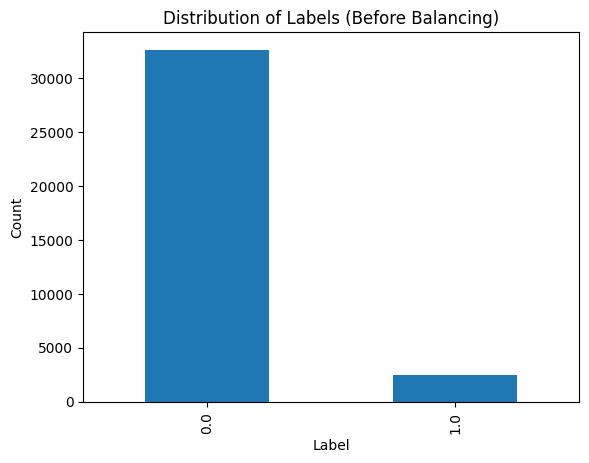

In [35]:
# plot the distribution of the 'label' column before balancing
y_test.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (Before Balancing)')
plt.show()

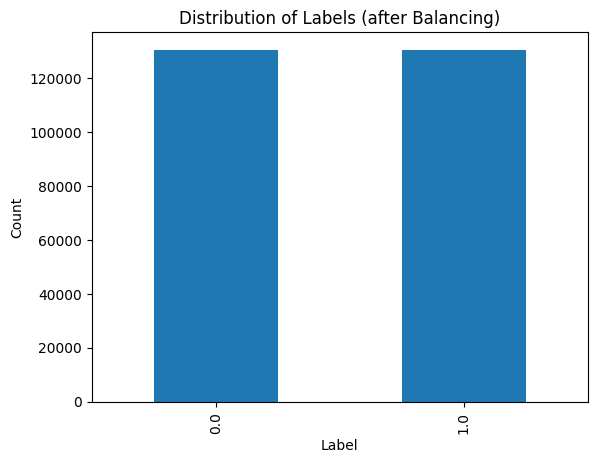

In [36]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=88)
x_train, y_train = over_sampler.fit_resample(x_train, y_train)

# plot the distribution of the 'label' column after balancing
y_train.value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (after Balancing)')
plt.show()

## DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

predicted = dt.predict(x_test)


accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


Accuracy: 0.8732213635974793 

                Predicted DOS  Predicted Not DOS
Actual DOS              28503               4113
Actual Not DOS            333               2120 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     32616
         1.0       0.34      0.86      0.49      2453

    accuracy                           0.87     35069
   macro avg       0.66      0.87      0.71     35069
weighted avg       0.94      0.87      0.90     35069



## LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(x_train,y_train)

predicted = Lr.predict(x_test)

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

Accuracy: 0.7787789785850752 

                Predicted DOS  Predicted Not DOS
Actual DOS              25156               7460
Actual Not DOS            298               2155 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.87     32616
         1.0       0.22      0.88      0.36      2453

    accuracy                           0.78     35069
   macro avg       0.61      0.82      0.61     35069
weighted avg       0.93      0.78      0.83     35069



# Features Selection

## Filter methods

In [39]:
train = pd.concat([x_train,y_train],axis=1)
corr=train.corr()
train.head(20)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,5.000001e-08,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.333333,0.996078,...,0.32,0.355556,0.390625,0.0,0.0,0.000000,0.271186,0.409836,0.0,0.0
1,1.500000e-07,0.909091,0.000000,0.375,0.000104,0.000000,0.000013,0.000000,0.111111,0.996078,...,0.02,0.022222,0.015625,0.0,0.0,0.000000,0.033898,0.016393,0.0,1.0
2,1.032554e-02,0.856061,0.416667,0.250,0.000936,0.000547,0.000041,0.000018,0.000024,0.996078,...,0.02,0.000000,0.062500,0.0,0.0,0.033333,0.033898,0.065574,0.0,0.0
3,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.08,0.088889,0.484375,0.0,0.0,0.000000,0.067797,0.508197,0.0,0.0
4,1.078210e-02,0.856061,0.416667,0.250,0.000936,0.000729,0.000064,0.000134,0.000026,0.243137,...,0.02,0.000000,0.000000,0.0,0.0,0.033333,0.016949,0.000000,0.0,0.0
5,1.500000e-07,0.901515,0.166667,0.375,0.000104,0.000000,0.000007,0.000000,0.111111,0.996078,...,0.32,0.355556,0.343750,0.0,0.0,0.000000,0.288136,0.360656,0.0,0.0
6,1.272234e-02,0.856061,0.333333,0.250,0.000728,0.000729,0.000026,0.000056,0.000020,0.243137,...,0.00,0.000000,0.015625,0.0,0.0,0.000000,0.016949,0.000000,0.0,0.0
7,1.500000e-07,0.363636,0.000000,0.375,0.000104,0.000000,0.000013,0.000000,0.111111,0.996078,...,0.02,0.022222,0.078125,0.0,0.0,0.000000,0.016949,0.081967,0.0,0.0
8,7.161168e-04,0.856061,0.000000,0.250,0.006136,0.005650,0.000277,0.003414,0.002816,0.121569,...,0.00,0.000000,0.046875,0.0,0.0,0.000000,0.033898,0.081967,0.0,0.0
9,1.500000e-07,0.901515,0.000000,0.375,0.000104,0.000000,0.000011,0.000000,0.111111,0.996078,...,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


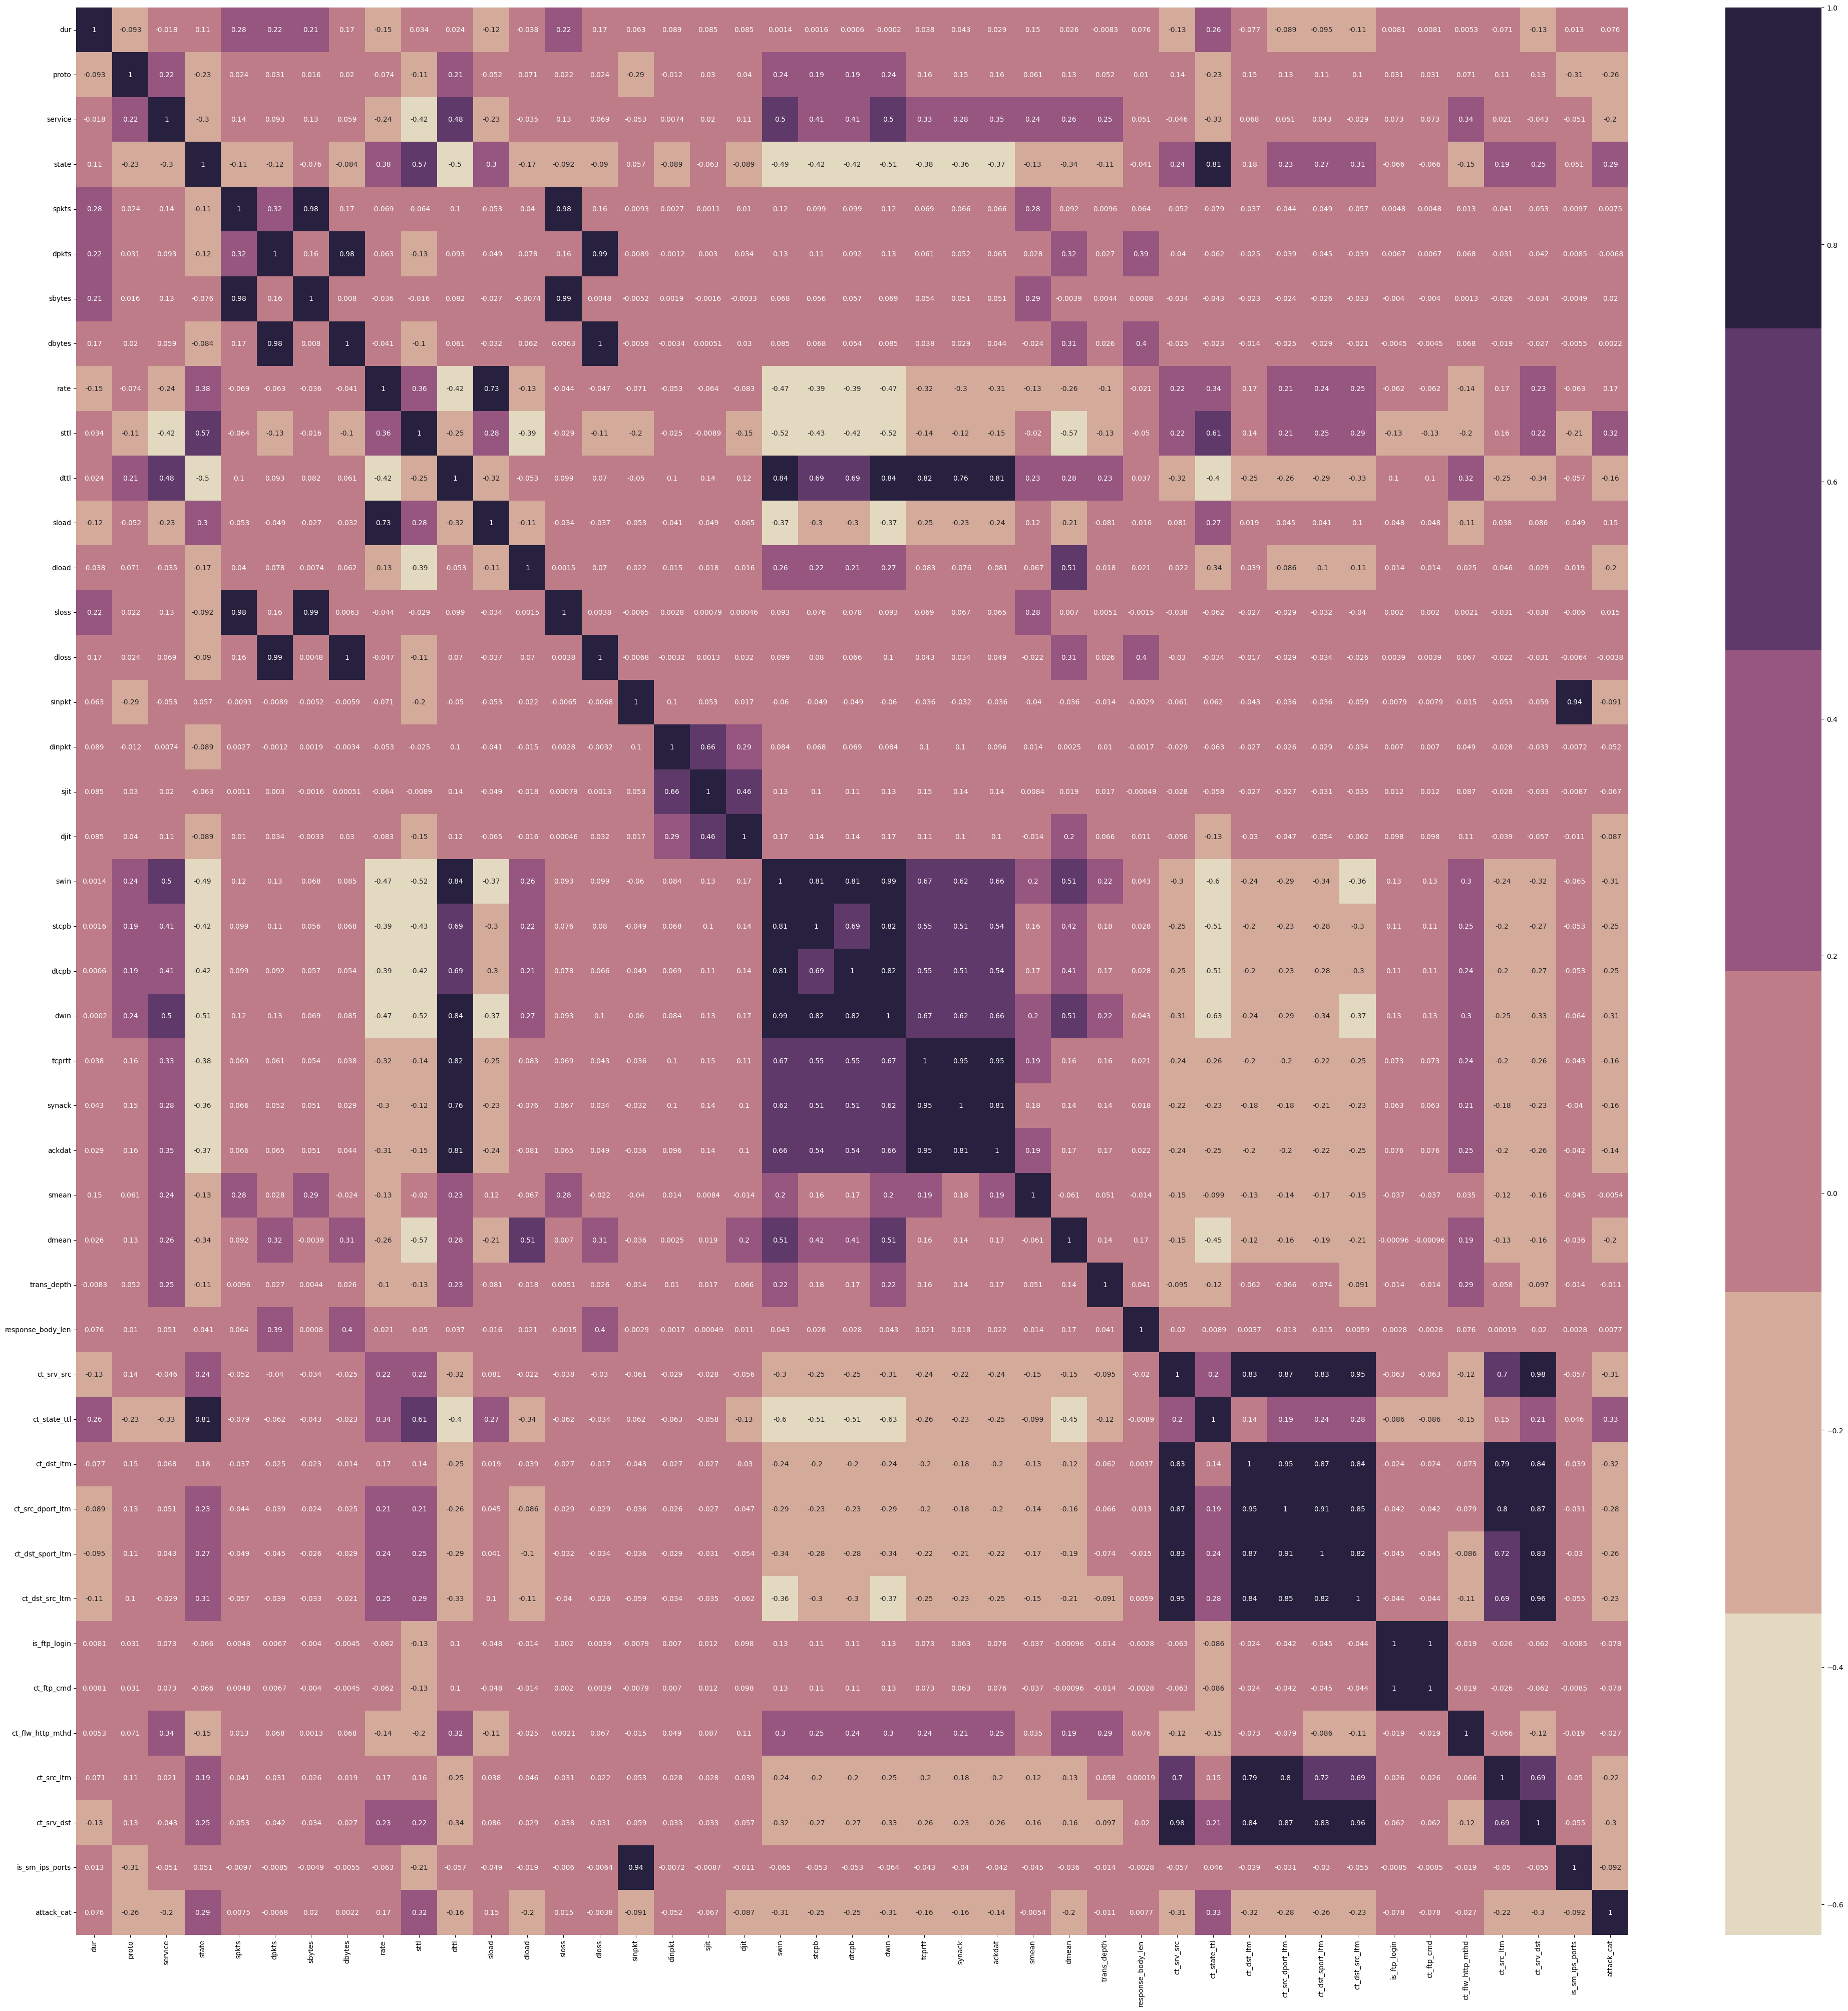

['proto', 'service', 'state', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst']


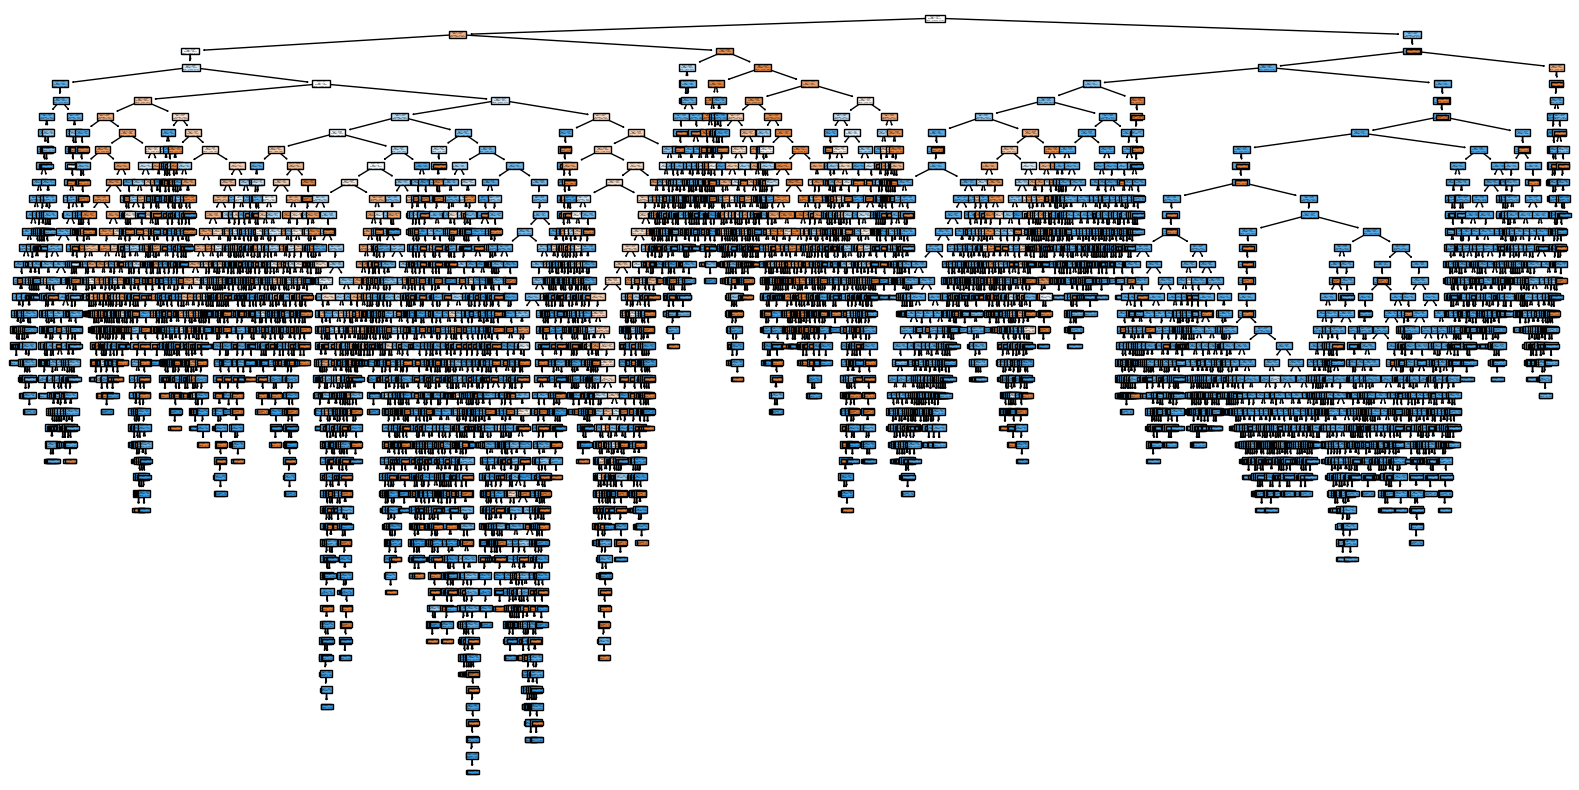

Accuracy: 0.8696854772020873 

                Predicted DOS  Predicted Not DOS
Actual DOS              28432               4184
Actual Not DOS            386               2067 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     32616
         1.0       0.33      0.84      0.47      2453

    accuracy                           0.87     35069
   macro avg       0.66      0.86      0.70     35069
weighted avg       0.94      0.87      0.89     35069



In [40]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt



plt.figure(figsize=(50,50))
sns.heatmap(corr, cmap= sns.color_palette("ch:s=-.2, r=.6"),annot=True)
plt.show()
cor_target=abs(corr['attack_cat'])
relevant_features= cor_target[cor_target >0.1]
names=[index for index, value in relevant_features.items()]
names.remove('attack_cat')
print(names)

# DecisionTrees:
X_train_selected = x_train[names]
# model = DecisionTreeClassifier()
 

dt = DecisionTreeClassifier()
dt.fit(X_train_selected, y_train)
X_test_selected = x_test[names]
predicted = dt.predict(X_test_selected)

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True)
plt.show()

accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)


# RandomForestClassifier feature selection+Classification

In [41]:
# Load the dataset

from sklearn.feature_selection import SelectFromModel


# Import the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
sel =SelectFromModel(RandomForestClassifier(n_estimators=100))

# Train the classifier using the training set
sel.fit(x_train, y_train)

# Get the feature importances
sel.get_support()
# Sort the features based on their importances in descending order
selected_fet=x_train.columns[(sel.get_support())]

print('nbr of features selected  ',len(selected_fet))

print(' features selected  ',selected_fet)



# Train a new classifier using only the selected features
rf_new = RandomForestClassifier(n_estimators=100)
rf_new.fit(x_train.loc[:, selected_fet], y_train)

# Test the new classifier using the testing set and evaluate its performance
y_pred = rf_new.predict(x_test.loc[:, selected_fet])
score = rf_new.score(x_test.loc[:, selected_fet], y_test)
print("Accuracy score: ", score)


Conf_Mat = confusion_matrix(y_test,y_pred)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,y_pred)
print("Classification report:\n", report)


nbr of features selected   15
 features selected   Index(['proto', 'service', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'sload',
       'dload', 'dinpkt', 'djit', 'smean', 'dmean', 'ct_srv_src',
       'ct_dst_src_ltm', 'ct_srv_dst'],
      dtype='object')
Accuracy score:  0.8790384670221563
                Predicted DOS  Predicted Not DOS
Actual DOS              28703               3913
Actual Not DOS            329               2124 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     32616
         1.0       0.35      0.87      0.50      2453

    accuracy                           0.88     35069
   macro avg       0.67      0.87      0.72     35069
weighted avg       0.94      0.88      0.90     35069



## CFS(mutual_info_classif)

<Axes: >

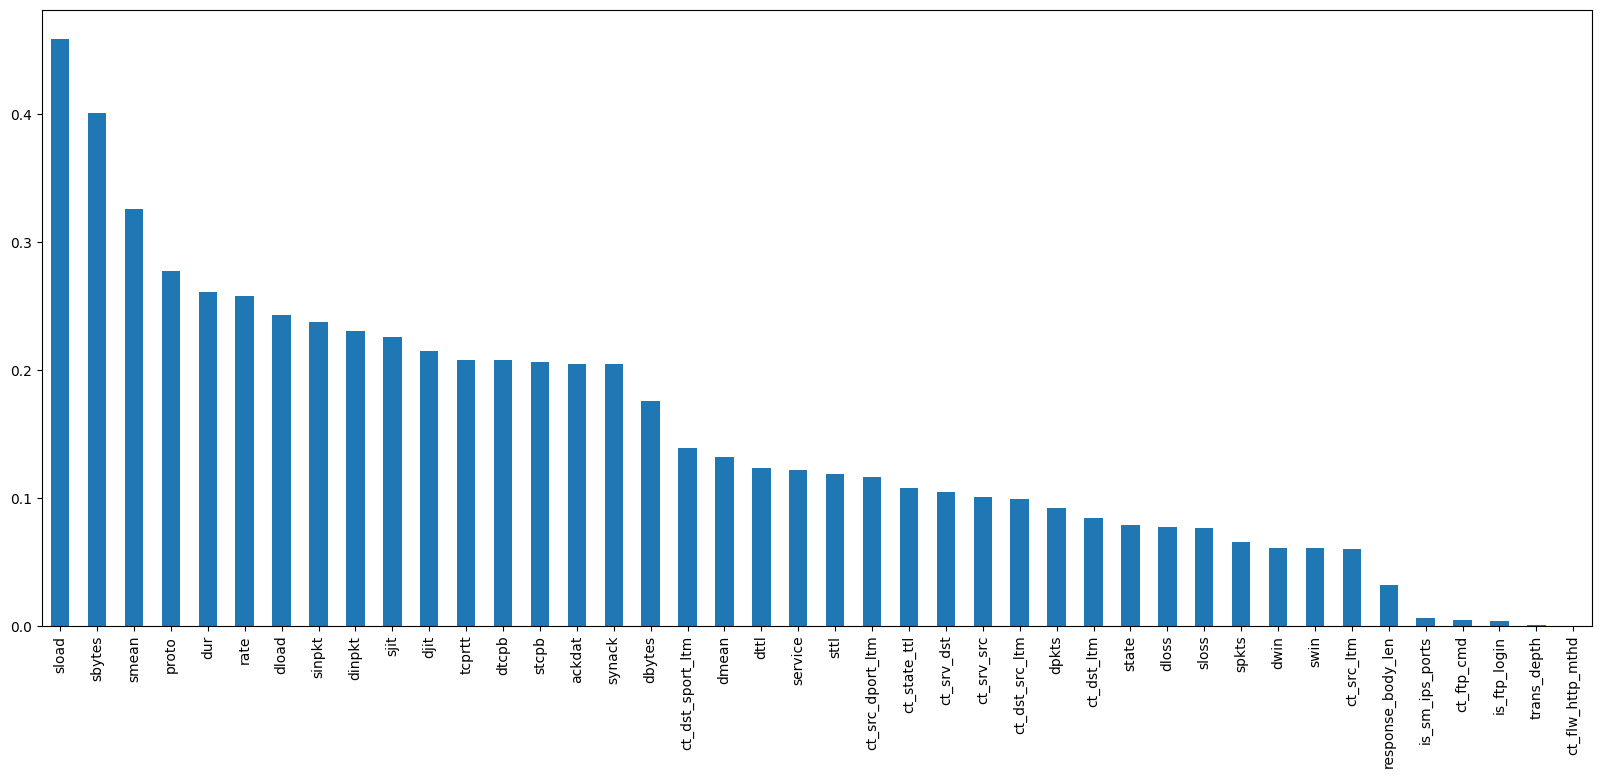

In [42]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [48]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.neighbors import KNeighborsClassifier
# Apply CFS to reduce the number of features to 30
#sfs1 = SFS(KNeighborsClassifier(n_neighbors=5),
          # k_features=30,
          # forward=True,
           #floating=False,
          # scoring='accuracy',
          # cv=0)
#sfs1 = sfs1.fit(x_train, y_train)
#X_train_cfs = X_train[:,sfs1.k_feature_idx_]*/

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif



# Feature selection using CFS
selector = SelectKBest(mutual_info_classif, k=37)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'response_body_len',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst'],
      dtype='object')


### DecisionTreeClassifier

Accuracy: 0.8733069092360775 

                Predicted DOS  Predicted Not DOS
Actual DOS              28510               4106
Actual Not DOS            337               2116 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     32616
         1.0       0.34      0.86      0.49      2453

    accuracy                           0.87     35069
   macro avg       0.66      0.87      0.71     35069
weighted avg       0.94      0.87      0.90     35069



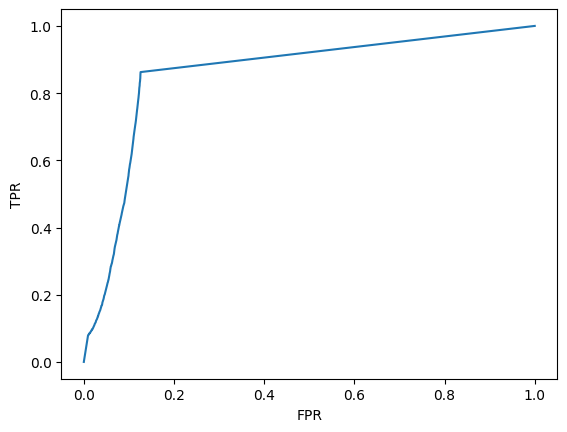

0.85719360624329


In [44]:
dt = DecisionTreeClassifier()

dt.fit(X_train_new, y_train)

predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")


Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### RandomForestClassifier

Accuracy: 0.8794947104280133 

                Predicted DOS  Predicted Not DOS
Actual DOS              28758               3858
Actual Not DOS            368               2085 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     32616
         1.0       0.35      0.85      0.50      2453

    accuracy                           0.88     35069
   macro avg       0.67      0.87      0.71     35069
weighted avg       0.94      0.88      0.90     35069



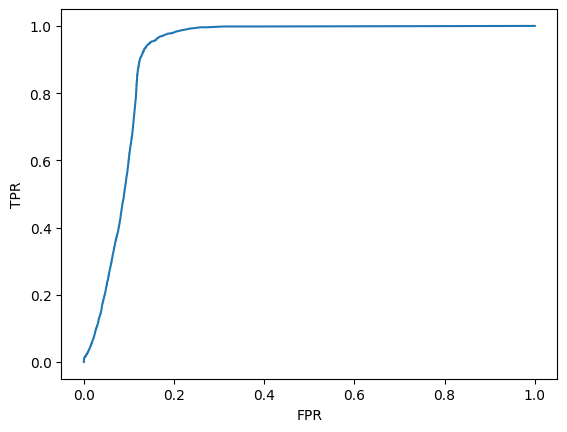

0.9139887900875933


In [45]:
Rf =  RandomForestClassifier(n_estimators =100)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### LogisticRegression

Accuracy: 0.7799481023125837 

                Predicted DOS  Predicted Not DOS
Actual DOS              25211               7405
Actual Not DOS            312               2141 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.87     32616
         1.0       0.22      0.87      0.36      2453

    accuracy                           0.78     35069
   macro avg       0.61      0.82      0.61     35069
weighted avg       0.93      0.78      0.83     35069



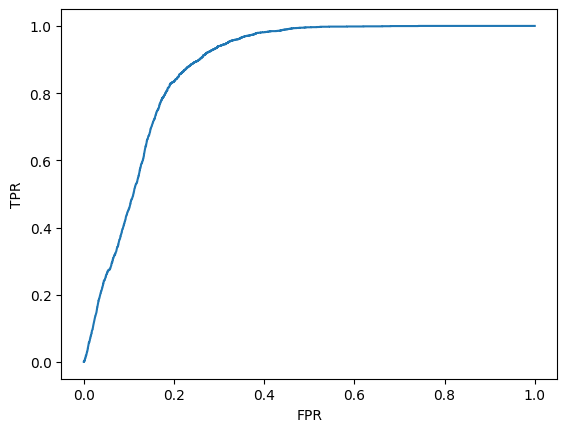

0.8762584641293103


In [46]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression(max_iter=500)

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

## Wrapper Methods

### RFE

### DecisionTreeClassifier

Accuracy: 0.8723944224243634 

                Predicted DOS  Predicted Not DOS
Actual DOS              28475               4141
Actual Not DOS            334               2119 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     32616
         1.0       0.34      0.86      0.49      2453

    accuracy                           0.87     35069
   macro avg       0.66      0.87      0.71     35069
weighted avg       0.94      0.87      0.90     35069



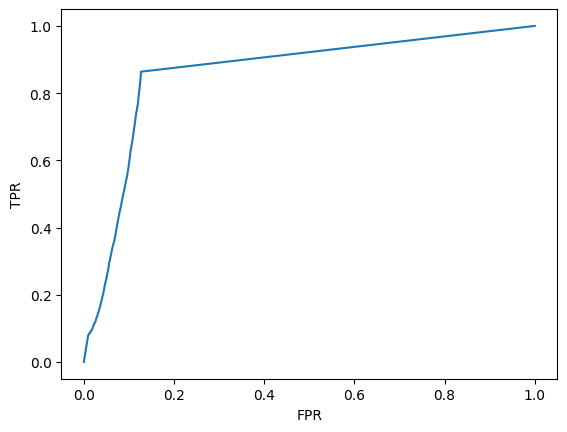

0.8599708678165453


In [47]:
from sklearn.feature_selection import RFE
estimator = DecisionTreeClassifier()
selector = RFE(estimator)

selector = selector.fit(x_train, y_train)


predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


### RandomForestClassifier

Accuracy: 0.878411132339103 

                Predicted DOS  Predicted Not DOS
Actual DOS              28717               3899
Actual Not DOS            365               2088 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93     32616
         1.0       0.35      0.85      0.49      2453

    accuracy                           0.88     35069
   macro avg       0.67      0.87      0.71     35069
weighted avg       0.94      0.88      0.90     35069



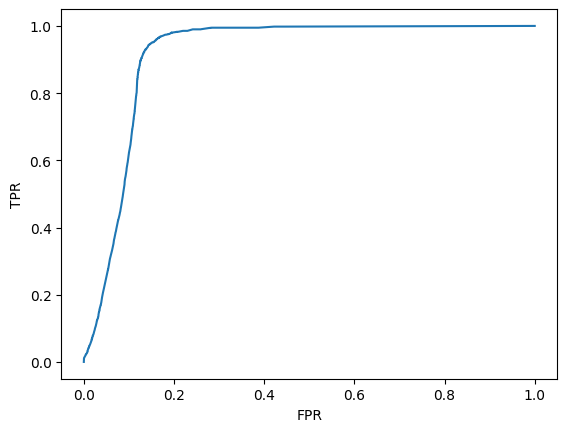

0.9148298222426604


In [48]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(n_estimators =100)
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


###  LogisticRegression

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abir.DESKTOP-8COR111\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Accuracy: 0.77555675953121 

                Predicted DOS  Predicted Not DOS
Actual DOS              25087               7529
Actual Not DOS            342               2111 

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     32616
         1.0       0.22      0.86      0.35      2453

    accuracy                           0.78     35069
   macro avg       0.60      0.81      0.61     35069
weighted avg       0.93      0.78      0.83     35069



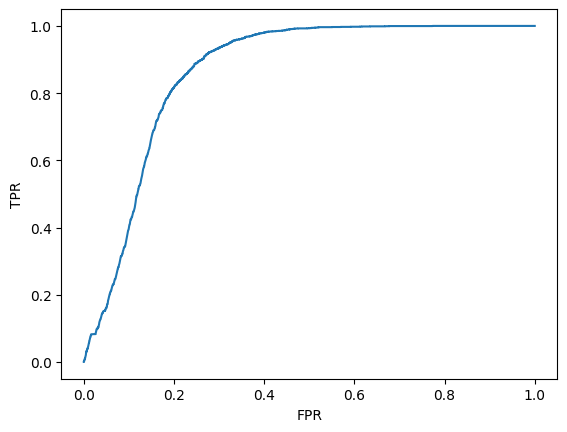

0.8654979746284353


In [49]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator)
selector = selector.fit(x_train, y_train)
predicted = selector.predict(x_test)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = selector.predict_proba(x_test)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)


## Embedded Methods

### chi2 

<Axes: >

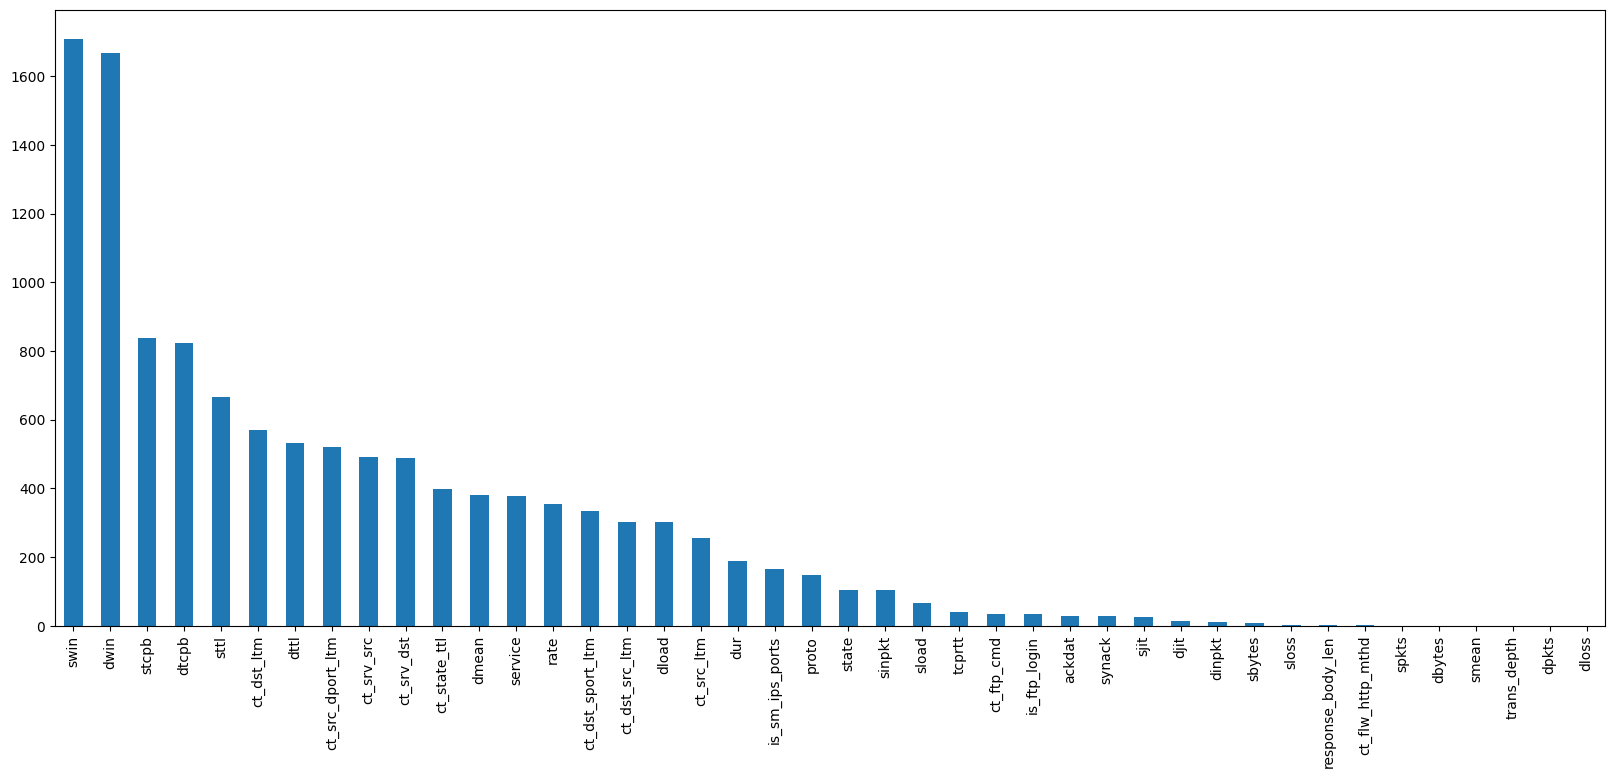

In [62]:
from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(x_train, y_train)
chi_scores = pd.Series(chi_scores)
p_values = pd.Series(p_values)
chi_scores.index = p_values.index = x_train.columns
chi_scores.sort_values(ascending=False)
chi_scores.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [63]:
from sklearn.feature_selection import SelectKBest

# Feature extraction
selector = SelectKBest(score_func=chi2, k=24)
X_train_new = selector.fit_transform(x_train, y_train)
X_test_new = selector.transform(x_test)
# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# Print selected features
selected_features = train.columns[selected_features_indices]
print("Selected features:", selected_features)

Selected features: Index(['dur', 'proto', 'service', 'state', 'rate', 'sttl', 'dttl', 'sload',
       'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst',
       'is_sm_ips_ports'],
      dtype='object')


### DecisionTreeClassifier

Accuracy: 0.9244917163306624 

                Predicted DOS  Predicted Not DOS
Actual DOS              32249                367
Actual Not DOS           2281                172 

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     32616
         1.0       0.32      0.07      0.11      2453

    accuracy                           0.92     35069
   macro avg       0.63      0.53      0.54     35069
weighted avg       0.89      0.92      0.90     35069



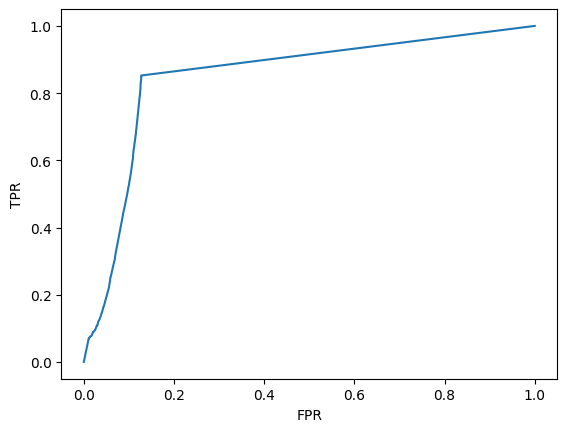

0.8493732014709504


In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
predicted = dt.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = dt.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### RandomForestClassifier

Accuracy: 0.9306795175225983 

                Predicted DOS  Predicted Not DOS
Actual DOS              32572                 44
Actual Not DOS           2387                 66 

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     32616
         1.0       0.60      0.03      0.05      2453

    accuracy                           0.93     35069
   macro avg       0.77      0.51      0.51     35069
weighted avg       0.91      0.93      0.90     35069



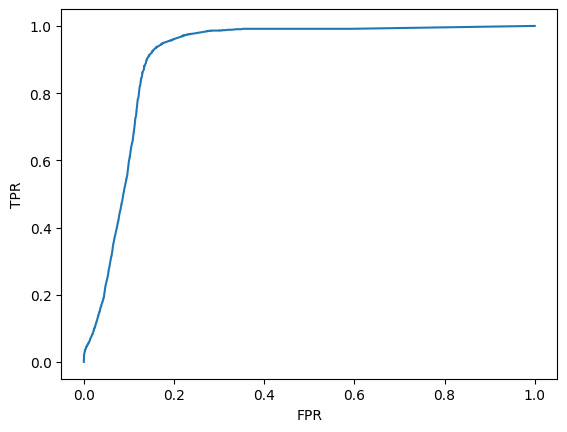

0.9067512839618829


In [65]:
Rf =  RandomForestClassifier(n_estimators =50)
Rf.fit(X_train_new, y_train)



predicted = Rf.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Rf.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_auc_score

roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()

Lr.fit(X_train_new,y_train)

predicted = Lr.predict(X_test_new)
accuracy = accuracy_score(y_test,predicted)
print("Accuracy:", accuracy,"\n")
Conf_Mat = confusion_matrix(y_test,predicted)
Conf_Mat = pd.DataFrame(Conf_Mat,index=['Actual DOS','Actual Not DOS'],columns=['Predicted DOS','Predicted Not DOS'])

print(Conf_Mat,"\n")
report = classification_report(y_test,predicted)
print("Classification report:\n", report)



y_prob = Lr.predict_proba(X_test_new)

y_prob = y_prob[:,1]

FPR, TPR, Thresholds = roc_curve(y_test, y_prob)

plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,y_prob)
print(roc_auc_score)